# <font color=blue>**TAREA 1**

- Utilizar estos datos(primera pestaña) para implementar :
    - Hard-clustering con k-means (no usar sklearn)
    - Soft-clustering con GMM usando sklearn(sklearn.mixture.GaussianMixture)
- Ejecutar al menos 5 experimentos para seleccionar el valor de “K”, 
    - Ambos métodos pueden usar el mismo valor de “K”
    - Analizar el centroide de cada cluster y determinar si es posible asignar una categoría cada cluster
- Analizar y concluir si el método del codo es adecuado para este problema 
- Usar los datos en la segunda pestaña(valtest(normales)) y estimar:
    - El cluster que k-means asigna cada uno.
    - La probabilidad de pertenecer a cada cluster según GMM.
- Usar GMM y simular 1000 observaciones para estimar(estimación de Monte Carlo) el valor esperado(promedio) de la función f : f(edad, estatura) = estatura /edad

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

In [40]:
Estaturas = pd.read_excel('estaturas.xlsx','normales')
EstaturasVT = pd.read_excel('estaturas.xlsx','valtest(normales)')
Estaturas

,Estatura(metros),Edad(años)
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


In [31]:
#Asignacion de valores K
K1=2
K2=3
K3=4
K4=5
K5=6

## <font color=blue> Hard-clustering con k-means

In [132]:
iteraciones = 100

def KMeans_fit(X, iteraciones,K):
    m= X.shape[0] 
    n= X.shape[1]

    
#falto implementar manualmente  
    

In [133]:
c = KMeans_fit(Estaturas,iteraciones,K1)
c

**Con Sklearn**

In [122]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=K1, random_state=0).fit(Estaturas)
print(kmeans1.labels_)
print(kmeans1.cluster_centers_)

[0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0]
[[ 1.7225     26.03125   ]
 [ 1.75571429 37.5       ]]


In [127]:
ProbE1 = kmeans1.predict(EstaturasVT)
pd.DataFrame(ProbE1)

,0
0,0
1,0
2,0
3,1
4,0
5,1
6,0
7,0


In [123]:
kmeans2 = KMeans(n_clusters=K2, random_state=0).fit(Estaturas)
print(kmeans2.labels_)
print(kmeans2.cluster_centers_)

[0 2 0 2 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 2 2 0 0 0 2 0 0 2 2 1 0 0
 0 0 1 0 2 2 1 0 0]
[[ 1.72758621 25.55172414]
 [ 1.77666667 48.33333333]
 [ 1.73357143 33.71428571]]


In [128]:
ProbE2 = kmeans2.predict(EstaturasVT)
pd.DataFrame(ProbE2)

,0
0,0
1,0
2,2
3,2
4,2
5,2
6,2
7,2


In [129]:
kmeans3 = KMeans(n_clusters=K3, random_state=0).fit(Estaturas)
print(kmeans3.labels_)
print(kmeans3.cluster_centers_)

[2 0 2 0 0 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 0 3 2 2 3 0 0 2 2 0 2 2 0 0 1 2 2
 2 2 3 2 0 0 1 2 2]
[[ 1.70928571 32.28571429]
 [ 1.84       51.        ]
 [ 1.73666667 25.2962963 ]
 [ 1.73333333 40.33333333]]


In [130]:
ProbE3 = kmeans3.predict(EstaturasVT)
pd.DataFrame(ProbE3)

,0
0,2
1,2
2,0
3,0
4,0
5,0
6,0
7,0


In [134]:
kmeans4 = KMeans(n_clusters=K4, random_state=0).fit(Estaturas)
print(kmeans4.labels_)
print(kmeans4.cluster_centers_)

[4 1 0 1 1 4 4 1 4 0 0 0 0 0 0 1 4 0 4 4 1 2 0 0 2 1 4 4 4 4 4 0 1 1 3 4 0
 0 0 2 4 1 1 3 4 4]
[[ 1.75571429 23.85714286]
 [ 1.73363636 33.09090909]
 [ 1.73333333 40.33333333]
 [ 1.84       51.        ]
 [ 1.698125   27.3125    ]]


In [135]:
ProbE4 = kmeans4.predict(EstaturasVT)
pd.DataFrame(ProbE4)

,0
0,0
1,4
2,1
3,1
4,4
5,1
6,1
7,1


**Conclusion Metodo Del Codo**
En este problema en particular ya que la cantidad de datos es minima, se concluye que no es necesario la utilizacion del metodo del codo.

## <font color=blue> Soft-clustering con GMM usando sklearn(sklearn.mixture.GaussianMixture)

**PRUEBA 1**

[0.60929157 0.39070843]
[[ 1.72384042 25.89825759]
 [ 1.74628242 35.17238953]]
[[[ 6.53928888e-03 -8.93540179e-02]
  [-8.93540179e-02  5.33211427e+00]]

 [[ 3.71334628e-03  2.01563366e-01]
  [ 2.01563366e-01  5.19781398e+01]]]


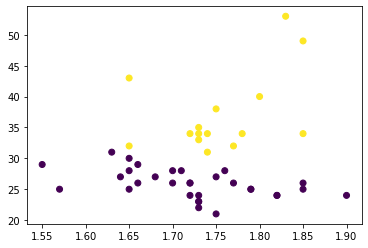

In [69]:
GMM1 = GaussianMixture(n_components=K1, random_state=0)
GMM1.fit(Estaturas)
print(GMM1.weights_)
print(GMM1.means_)
print(GMM1.covariances_)
Pred1 = GMM1.predict(Estaturas)

plt.scatter(Estaturas.iloc[:, 0], Estaturas.iloc[:, 1], c=Pred1);

In [48]:
Prob1 = GMM1.predict_proba(EstaturasVT)
print("PROBABILIDAD")
pd.DataFrame(Prob1,columns=['Prob K1','Prob K2'])

PROBABILIDAD


,Prob K1,Prob K2
0,0.977318,0.022682
1,0.899945,0.100055
2,0.855644,0.144356
3,0.051101,0.948899
4,0.230555,0.769445
5,0.020492,0.979508
6,0.067214,0.932786
7,0.805180,0.194820


**PRUEBA 2**

[0.62248755 0.06521791 0.31229455]
[[ 1.72807829 25.58286677]
 [ 1.77666741 48.33323415]
 [ 1.73243803 33.4444868 ]]
[[[ 6.15245553e-03 -6.94306691e-02]
  [-6.94306691e-02  4.37600428e+00]]

 [[ 8.08974308e-03  3.24437283e-01]
  [ 3.24437283e-01  1.68897452e+01]]

 [[ 3.38864952e-03  9.91520595e-02]
  [ 9.91520595e-02  8.53204811e+00]]]


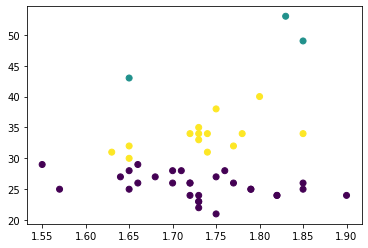

In [33]:
GMM2 = GaussianMixture(n_components=K2, random_state=0)
GMM2.fit(Estaturas)
print(GMM2.weights_)
print(GMM2.means_)
print(GMM2.covariances_)
Pred2 = GMM2.predict(Estaturas)

plt.scatter(Estaturas.iloc[:, 0], Estaturas.iloc[:, 1], c=Pred2);

In [47]:
Prob2 = GMM2.predict_proba(EstaturasVT)
print("PROBABILIDAD")
pd.DataFrame(Prob2,columns=['Prob K1','Prob K2','Prob K3'])

PROBABILIDAD


,Prob K1,Prob K2,Prob K3
0,0.999992,1.025468e-36,0.000008
1,0.998462,4.420031e-29,0.001538
2,0.464403,2.663737e-07,0.535597
3,0.012339,2.704640e-02,0.960614
4,0.530903,1.443813e-22,0.469097
5,0.004979,5.092273e-15,0.995021
6,0.052218,1.505383e-18,0.947782
7,0.374741,8.381399e-08,0.625259


**PRUEBA 3**

[0.24780468 0.06521724 0.25677794 0.43020014]
[[ 1.67056857 28.20035884]
 [ 1.77666859 48.33329889]
 [ 1.75158586 34.17089106]
 [ 1.7503387  24.65611208]]
[[[ 3.05297376e-03 -4.71155474e-02]
  [-4.71155474e-02  3.25658573e+00]]

 [[ 8.08968354e-03  3.24434494e-01]
  [ 3.24434494e-01  1.68895079e+01]]

 [[ 1.96126271e-03  4.24249964e-02]
  [ 4.24249964e-02  6.84108283e+00]]

 [[ 5.71645385e-03 -1.49520707e-02]
  [-1.49520707e-02  2.60517037e+00]]]


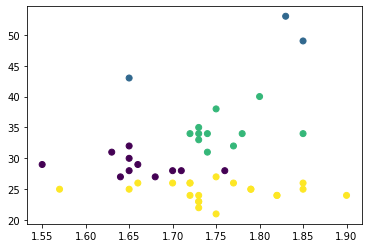

In [34]:
GMM3 = GaussianMixture(n_components=K3, random_state=0)
GMM3.fit(Estaturas)
print(GMM3.weights_)
print(GMM3.means_)
print(GMM3.covariances_)
Pred3 = GMM3.predict(Estaturas)

plt.scatter(Estaturas.iloc[:, 0], Estaturas.iloc[:, 1], c=Pred3);

In [49]:
Prob3 = GMM3.predict_proba(EstaturasVT)
print("PROBABILIDAD")
pd.DataFrame(Prob3,columns=['Prob K1','Prob K2','Prob K3','Prob K4'])

PROBABILIDAD


,Prob K1,Prob K2,Prob K3,Prob K4
0,0.027450,9.253041e-37,0.000022,9.725283e-01
1,0.154864,5.890750e-29,0.004240,8.408956e-01
2,0.989679,9.964853e-08,0.009619,7.015457e-04
3,0.499112,8.793084e-02,0.412957,5.183732e-07
4,0.045261,1.585191e-22,0.849342,1.053973e-01
5,0.002575,4.482202e-15,0.997365,6.083731e-05
6,0.008991,1.131216e-18,0.988814,2.194692e-03
7,0.981125,3.729918e-08,0.018115,7.592763e-04


**PRUEBA 4**

[0.20399847 0.04347826 0.24727015 0.4397062  0.06554692]
[[ 1.67897568 27.8123578 ]
 [ 1.84       51.        ]
 [ 1.73048713 32.97000029]
 [ 1.7478479  24.64599493]
 [ 1.73406862 40.29442874]]
[[[ 3.66016528e-03 -3.85756599e-02]
  [-3.85756599e-02  1.43508029e+00]]

 [[ 1.01000000e-04 -2.00000000e-02]
  [-2.00000000e-02  4.00000100e+00]]

 [[ 3.32677647e-03  4.42590700e-02]
  [ 4.42590700e-02  2.08026463e+00]]

 [[ 5.75460727e-03 -1.68678236e-02]
  [-1.68678236e-02  2.51377356e+00]]

 [[ 3.95833928e-03 -9.87216938e-02]
  [-9.87216938e-02  4.46170031e+00]]]


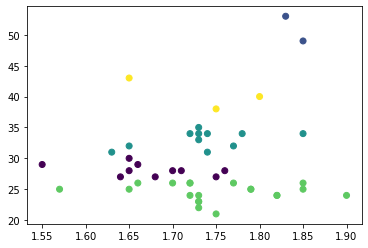

In [35]:
GMM4 = GaussianMixture(n_components=K4, random_state=0)
GMM4.fit(Estaturas)
print(GMM4.weights_)
print(GMM4.means_)
print(GMM4.covariances_)
Pred4 = GMM4.predict(Estaturas)

plt.scatter(Estaturas.iloc[:, 0], Estaturas.iloc[:, 1], c=Pred4);

In [50]:
Prob4 = GMM4.predict_proba(EstaturasVT)
print("PROBABILIDAD")
pd.DataFrame(Prob4,columns=['Prob K1','Prob K2','Prob K3','Prob K4','Prob K5'])

PROBABILIDAD


,Prob K1,Prob K2,Prob K3,Prob K4,Prob K5
0,0.040728,0.0,2.773676e-13,9.592725e-01,2.084071e-20
1,0.332125,0.0,1.668847e-07,6.678745e-01,6.357970e-16
2,0.263590,0.0,7.351682e-01,1.241778e-03,9.468406e-19
3,0.000002,0.0,9.999974e-01,5.024840e-07,2.564566e-07
4,0.039483,0.0,4.036229e-01,5.568917e-01,2.243610e-06
5,0.000004,0.0,9.999623e-01,3.402778e-05,1.822634e-07
6,0.000376,0.0,9.956654e-01,3.957726e-03,5.169672e-07
7,0.194323,0.0,8.045332e-01,1.143333e-03,4.816205e-18


**PRUEBA 5**

[0.25702759 0.04347826 0.19393945 0.22537343 0.06576301 0.21441825]
[[ 1.67291887 28.50326202]
 [ 1.84       51.        ]
 [ 1.75098362 33.49050991]
 [ 1.78247459 23.62793318]
 [ 1.73436409 40.27743685]
 [ 1.71281204 25.69379192]]
[[[ 3.15315793e-03 -3.80124945e-02]
  [-3.80124945e-02  3.06418760e+00]]

 [[ 1.01000000e-04 -2.00000000e-02]
  [-2.00000000e-02  4.00000100e+00]]

 [[ 1.85238815e-03  5.60654231e-03]
  [ 5.60654231e-03  1.21242223e+00]]

 [[ 3.27971154e-03  4.13235563e-02]
  [ 4.13235563e-02  1.72299666e+00]]

 [[ 3.97803268e-03 -1.00190090e-01]
  [-1.00190090e-01  4.54547565e+00]]

 [[ 5.84319248e-03 -2.90728813e-03]
  [-2.90728813e-03  8.91663537e-01]]]


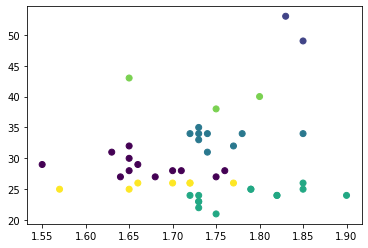

In [36]:
GMM5 = GaussianMixture(n_components=K5, random_state=0)
GMM5.fit(Estaturas)
print(GMM5.weights_)
print(GMM5.means_)
print(GMM5.covariances_)
Pred5 = GMM5.predict(Estaturas)

plt.scatter(Estaturas.iloc[:, 0], Estaturas.iloc[:, 1], c=Pred5);

In [51]:
Prob5 = GMM5.predict_proba(EstaturasVT)
print("PROBABILIDAD")
pd.DataFrame(Prob5,columns=['Prob K1','Prob K2','Prob K3','Prob K4','Prob K5','Prob K6'])

PROBABILIDAD


,Prob K1,Prob K2,Prob K3,Prob K4,Prob K5,Prob K6
0,0.017208,0.0,6.795702e-15,6.886905e-01,3.166280e-20,2.941010e-01
1,0.263257,0.0,2.555593e-08,6.624451e-02,1.582720e-15,6.704983e-01
2,0.997899,0.0,2.100398e-03,3.878775e-19,6.235436e-19,2.555746e-07
3,0.622069,0.0,3.779313e-01,8.551125e-34,1.447064e-07,2.924331e-19
4,0.758897,0.0,2.393506e-01,9.654553e-05,1.554682e-06,1.654012e-03
5,0.010384,0.0,9.896161e-01,6.312843e-14,2.416333e-07,2.666690e-10
6,0.097857,0.0,9.021410e-01,5.513207e-09,6.156518e-07,1.093435e-06
7,0.996185,0.0,3.814644e-03,1.586380e-18,3.577643e-18,2.596076e-07


**Estimacion De Monte Carlo**

In [67]:
def f(estatura,edad):
    return (estatura/edad)

In [68]:
muestra,cluster = GMM2.sample(1000)

muestra_f = f(muestra[:,0],muestra[:,1])
valor_esperado_f = np.mean(muestra_f)
print("VALOR ESPERADO PROMEDIO")
print(valor_esperado_f)

VALOR ESPERADO PROMEDIO
0.06098351278486633
